### Environment Setup 

Before coding, downgrade the Tensorflow version to v2.9 due to "keras model saving" issues for EfficientNet base model. 

"TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>." error in TF v2.10 and above

Use: 
>> !pip install tensorflow==2.9

Then Restart Run time and skip this line

In [1]:
!pip install tensorflow==2.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 41.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting unin

2.9.0


In [1]:
import tensorflow
print(tensorflow.__version__)

2.9.0


In [2]:
! pip install -q kaggle

Import kaggle.json file to workspace

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"atalaypabuu","key":"bc89ef988535d8f2498260a602b8e8ef"}'}

Make directory named kaggle and copy kaggle.json file there.

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

Change the permissions of the file.

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

Go to dataset link, "Copy API command".

It will give an output as

>> ! kaggle datasets download -d ravirajsinh45/real-life-industrial-dataset-of-casting-product

Add quotes to the beginning and end of the dataset name as:

>> ! kaggle datasets download -d 'ravirajsinh45/real-life-industrial-dataset-of-casting-product'

https://www.kaggle.com/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product

In [6]:
! kaggle datasets download -d 'ravirajsinh45/real-life-industrial-dataset-of-casting-product'

 92% 92.0M/100M [00:00<00:00, 191MB/s]
100% 100M/100M [00:00<00:00, 180MB/s] 


Unzip the downloaded dataset

In [7]:
import zipfile

# Unzip the downloaded file
def unzip_data(zip_file_name):
  zip_ref = zipfile.ZipFile(zip_file_name, "r")
  zip_ref.extractall()
  zip_ref.close()

In [8]:
unzip_data('/content/real-life-industrial-dataset-of-casting-product.zip')

In [9]:
ROOT_DIR = '/content'

DATASET_PATH = '/content/casting_data'

DATASET_TRAINING_PATH = '/content/casting_data/casting_data/train'
DATASET_TESTING_PATH = '/content/casting_data/casting_data/test'

TRAINING_OK_FRONT_PATH = '/content/casting_data/casting_data/train/ok_front'
TRAINING_DEF_FRONT_PATH = '/content/casting_data/casting_data/train/def_front'
TESTING_OK_FRONT_PATH = '/content/casting_data/casting_data/test/ok_front'
TESTING_DEF_FRONT_PATH = '/content/casting_data/casting_data/test/def_front'

LOGS_PATH = '/content/logs'
MODEL_CHECKPOINT_PATH = '/content/drive/MyDrive/MASTER/Master_Graduation_Project/Google_Colab_Workspace/Transfer_Learning_Bearing_DS/Checkpoint/base_model_checkpoint/cp.ckpt'
MODEL_SAVE_PATH = '/content/drive/MyDrive/MASTER/Master_Graduation_Project/Google_Colab_Workspace/Transfer_Learning_Bearing_DS/Model/'

In [10]:
import os

def walk_through_dir(data_dir):
  for dirpath, dirnames, filenames in os.walk(data_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

Visualize the Directory content

In [11]:
walk_through_dir(DATASET_PATH)

There are 1 directories and 0 images in '/content/casting_data'.
There are 2 directories and 0 images in '/content/casting_data/casting_data'.
There are 2 directories and 0 images in '/content/casting_data/casting_data/test'.
There are 0 directories and 453 images in '/content/casting_data/casting_data/test/def_front'.
There are 0 directories and 262 images in '/content/casting_data/casting_data/test/ok_front'.
There are 2 directories and 0 images in '/content/casting_data/casting_data/train'.
There are 0 directories and 3758 images in '/content/casting_data/casting_data/train/def_front'.
There are 0 directories and 2875 images in '/content/casting_data/casting_data/train/ok_front'.


### Environment Setup End

In [12]:
# Setup data inputs
import tensorflow as tf

IMG_SIZE = (224, 224)   # For EfficientNet Input

train_data = tf.keras.preprocessing.image_dataset_from_directory(DATASET_TRAINING_PATH,
                                                                                label_mode="categorical",
                                                                                image_size=IMG_SIZE)
                                                                                
test_data = tf.keras.preprocessing.image_dataset_from_directory(DATASET_TESTING_PATH,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False) # don't shuffle test data for prediction analysis

Found 6633 files belonging to 2 classes.
Found 715 files belonging to 2 classes.


In [13]:
print("Training Data class names: ", train_data.class_names)
print("Testing Data class names: ", test_data.class_names)

Training Data class names:  ['def_front', 'ok_front']
Testing Data class names:  ['def_front', 'ok_front']


In [14]:
checkpoint_path = MODEL_CHECKPOINT_PATH

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                         monitor='val_accuracy', 
                                                         verbose=2, 
                                                         save_best_only=True, 
                                                         save_weights_only=True)

### Add Data Augmentation Layer to the Model

In [15]:
ADD_DATA_AUG_TO_MODEL = False

In [16]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Setup data augmentation
data_augmentation = Sequential([
  preprocessing.RandomFlip("horizontal"), # randomly flip images on horizontal edge
  preprocessing.RandomRotation(0.2), # randomly rotate images by a specific amount
  preprocessing.RandomHeight(0.2), # randomly adjust the height of an image by a specific amount
  preprocessing.RandomWidth(0.2), # randomly adjust the width of an image by a specific amount
  preprocessing.RandomZoom(0.2), # randomly zoom into an image
  # preprocessing.Rescaling(1./255) # keep for models like ResNet50V2, remove for EfficientNet
], name="data_augmentation")

### Create Base model (EfficientNetB0)

In [17]:
INPUT_SHAPE = (224, 224, 3)

In [18]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet')
# pre-training on ImageNet, or the path to the weights file (file.h5) to be loaded
base_model.trainable = False

# Setup model architecture with trainable top layers (Add layer to the end of base model)
inputs = layers.Input(shape=INPUT_SHAPE, name='input_layer')
if ADD_DATA_AUG_TO_MODEL == True:
  augmented = data_augmentation(inputs)  # Apply data augmentation during Training process
  out_base_model = base_model(augmented, training=False)  # Put the base model in inference mode to extract features
else:
  out_base_model = base_model(inputs, training=False)  # Put the base model in inference mode to extract features
avg_pool = layers.GlobalAveragePooling2D(name='global_avg_pooling')(out_base_model)  # Pool the outputs of the base model
outputs = layers.Dense(len(train_data.class_names), activation='softmax', name='output')(avg_pool)

model = tf.keras.Model(inputs, outputs)

# Check the model architecture using the model.summary()
model.summary()

16705208/16705208 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling (GlobalA  (None, 1280)             0         
 veragePooling2D)                                                
                                                                 
 output (Dense)              (None, 2)                 2562      
                                                                 
Total params: 4,052,133
Trainable params: 2,562
Non-trainable params: 4,049,571
_________________________________________________________________


### Train the Model

In [19]:
NUM_EPOCHS = 5

# Compile
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(), # use Adam with default settings - learning_rate = 0.001
              metrics=["accuracy"])

# Fit
model_history = model.fit(train_data, epochs=NUM_EPOCHS,
                                  validation_data=test_data,
                                  validation_steps=int(0.15 * len(test_data)), # evaluate on smaller portion of test data
                                  callbacks=[checkpoint_callback]) # save best model weights to file

Epoch 1/5
208/208 [==============================] - ETA: 0s - loss: 0.2645 - accuracy: 0.9311
Epoch 1: val_accuracy improved from -inf to 0.92708, saving model to /content/drive/MyDrive/MASTER/Master_Graduation_Project/Google_Colab_Workspace/Transfer_Learning_Bearing_DS/Checkpoint/base_model_checkpoint/cp.ckpt
208/208 [==============================] - 33s 94ms/step - loss: 0.2645 - accuracy: 0.9311 - val_loss: 0.2023 - val_accuracy: 0.9271
Epoch 2/5
207/208 [============================>.] - ETA: 0s - loss: 0.1035 - accuracy: 0.9861
Epoch 2: val_accuracy improved from 0.92708 to 0.93750, saving model to /content/drive/MyDrive/MASTER/Master_Graduation_Project/Google_Colab_Workspace/Transfer_Learning_Bearing_DS/Checkpoint/base_model_checkpoint/cp.ckpt
208/208 [==============================] - 16s 74ms/step - loss: 0.1034 - accuracy: 0.9861 - val_loss: 0.1743 - val_accuracy: 0.9375
Epoch 3/5
207/208 [============================>.] - ETA: 0s - loss: 0.0709 - accuracy: 0.9893
Epoch 3: v

validation_steps parameter of model.fit():

* steps_per_epoch = TotalTrainingSamples / TrainingBatchSize
* validation_steps = TotalvalidationSamples / ValidationBatchSize (recommended)


https://stackoverflow.com/questions/45943675/meaning-of-validation-steps-in-keras-sequential-fit-generator-parameter-list

### Load weights using Model Checkpoint

In [20]:
checkpoint_dir = os.path.dirname(checkpoint_path)
# Check the Model checkpoint directory
os.listdir(checkpoint_dir)

['cp.ckpt.index', 'cp.ckpt.data-00000-of-00001', 'checkpoint']

In [21]:
# Loads the weights
model.load_weights(checkpoint_path)

### Save the base model (to Google Drive)

3 ways to save model:
2 of them is not working properly with custom models. Use the third alternative.

In [22]:
! pip install pyyaml h5py  # Required to save models in HDF5 format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
model_save_path = os.path.join(MODEL_SAVE_PATH, 'base_model_bearing_ds')  # fine_tune_model_bearing_ds
model_save_path

'/content/drive/MyDrive/MASTER/Master_Graduation_Project/Google_Colab_Workspace/Transfer_Learning_Bearing_DS/Model/base_model_bearing_ds'

In [26]:
model.save(model_save_path)   # Returns "TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>." error in TF v2.10 and above
# tf.keras.models.save_model(model, model_save_path)  # Returns "TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>." error in TF v2.10 and above
# tf.saved_model.save(model, model_save_path)   # Works properly but it does not return Keras Model object

### Load the model

In [27]:
# model = tf.saved_model.load(model_save_path)  # Do Not use! This function does not return tf.keras.Model object, it returns _UserObject
# model = tf.keras.models.load_model(model_save_path)
# model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling (GlobalA  (None, 1280)             0         
 veragePooling2D)                                                
                                                                 
 output (Dense)              (None, 2)                 2562      
                                                                 
Total params: 4,052,133
Trainable params: 2,562
Non-trainable params: 4,049,571
_________________________________________________________________


### Evaluate the model

In [29]:
# Evaluate model 
results = model.evaluate(test_data)
results

23/23 [==============================] - 2s 95ms/step - loss: 0.0695 - accuracy: 0.9930


[0.06952744722366333, 0.9930070042610168]

In [30]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_and_acc_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

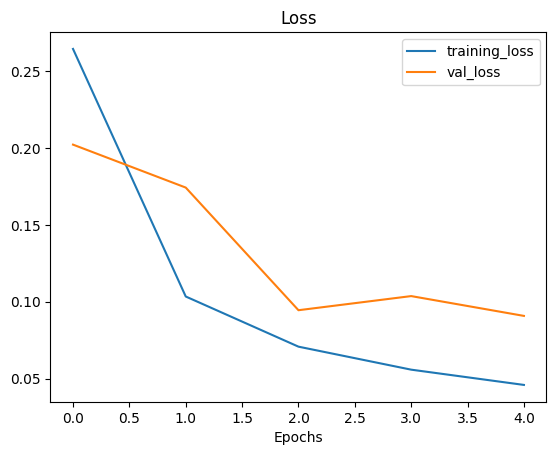

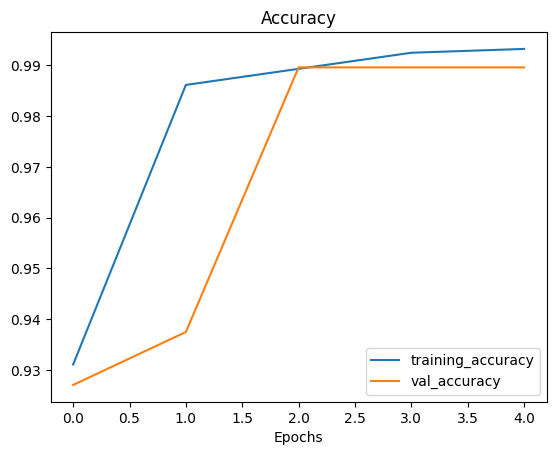

In [31]:
plot_loss_and_acc_curves(model_history)

### Fine-tune the base model

In [47]:
base_model.trainable= True  # Initially unfreeze all layers of the base model

# Freeze all layers again except last (top) 5 layers
for layer in base_model.layers[:-5]:
  layer.trainable = False

### Compile the model again for Fine-tuning

We will use lower learning rate to ensure the updates to the previous trained weights aren't too large. (Learning_rate = 0.0001)

In [48]:
# Recompile model with lower learning rate
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), # 10x lower learning rate than default
              metrics=['accuracy'])

### Train the model after fine-tuning

In [49]:
FINE_TUNE_EPOCHS = 5
NUM_EPOCHS_AFTER_FINE_TUNE = NUM_EPOCHS + FINE_TUNE_EPOCHS   # model has already done NUM_EPOCHS epochs, this is the total number of epochs we're after (NUM_EPOCHS + FINE_TUNE_EPOCHS)

fine_tune_model_history = model.fit(train_data,
                                    epochs=NUM_EPOCHS_AFTER_FINE_TUNE,
                                    validation_data=test_data,
                                    validation_steps=int(0.15 * len(test_data)), # validate on 15% of the test data
                                    initial_epoch=model_history.epoch[-1])       # start from last epoch

Epoch 5/10
208/208 [==============================] - 22s 81ms/step - loss: 0.0468 - accuracy: 0.9929 - val_loss: 0.0977 - val_accuracy: 0.9896
Epoch 6/10
208/208 [==============================] - 16s 75ms/step - loss: 0.0456 - accuracy: 0.9932 - val_loss: 0.0955 - val_accuracy: 0.9896
Epoch 7/10
208/208 [==============================] - 16s 74ms/step - loss: 0.0441 - accuracy: 0.9932 - val_loss: 0.0948 - val_accuracy: 0.9896
Epoch 8/10
208/208 [==============================] - 16s 74ms/step - loss: 0.0430 - accuracy: 0.9932 - val_loss: 0.0891 - val_accuracy: 0.9896
Epoch 9/10
208/208 [==============================] - 19s 91ms/step - loss: 0.0419 - accuracy: 0.9935 - val_loss: 0.0902 - val_accuracy: 0.9896
Epoch 10/10
208/208 [==============================] - 17s 79ms/step - loss: 0.0408 - accuracy: 0.9940 - val_loss: 0.0923 - val_accuracy: 0.9896


In [50]:
# Evaluate fine-tuned model on the whole test dataset
fine_tune_model_results = model.evaluate(test_data)
fine_tune_model_results

23/23 [==============================] - 2s 79ms/step - loss: 0.0498 - accuracy: 0.9930


[0.0497768260538578, 0.9930070042610168]

In [51]:
def compare_historys(base_model_history, fine_tune_model_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get base_model history measurements
    acc = base_model_history.history["accuracy"]
    loss = base_model_history.history["loss"]

    print(len(acc))

    val_acc = base_model_history.history["val_accuracy"]
    val_loss = base_model_history.history["val_loss"]

    # Combine base_model history with fine_tune_model_history
    total_acc = acc + fine_tune_model_history.history["accuracy"]
    total_loss = loss + fine_tune_model_history.history["loss"]

    total_val_acc = val_acc + fine_tune_model_history.history["val_accuracy"]
    total_val_loss = val_loss + fine_tune_model_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.9311020374298096, 0.9861299395561218, 0.9892959594726562, 0.9924619197845459, 0.9932157397270203, 0.9929141998291016, 0.9932157397270203, 0.9932157397270203, 0.9932157397270203, 0.993517279624939, 0.9939695596694946]


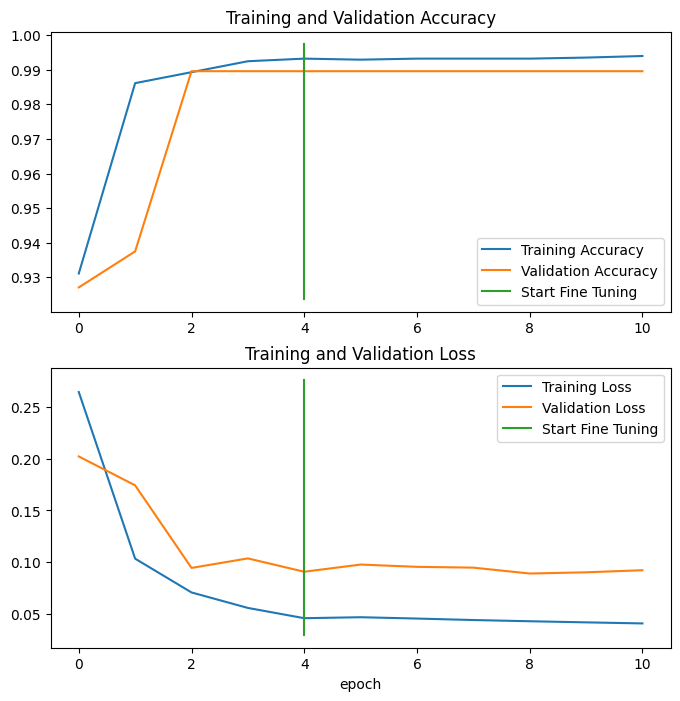

In [52]:
compare_historys(model_history, fine_tune_model_history, NUM_EPOCHS)

### Save the Fine-Tuned model (to Google Drive)

In [53]:
model_save_path = os.path.join(MODEL_SAVE_PATH, 'fine_tune_model_bearing_ds')
model_save_path

'/content/drive/MyDrive/MASTER/Master_Graduation_Project/Google_Colab_Workspace/Transfer_Learning_Bearing_DS/Model/fine_tune_model_bearing_ds'

In [54]:
model.save(model_save_path)

### Load the model

In [55]:
fine_tuned_model = tf.keras.models.load_model(model_save_path)
fine_tuned_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling (GlobalA  (None, 1280)             0         
 veragePooling2D)                                                
                                                                 
 output (Dense)              (None, 2)                 2562      
                                                                 
Total params: 4,052,133
Trainable params: 2,562
Non-trainable params: 4,049,571
_________________________________________________________________


In [56]:
print("Base odel (EfficientNet) Layers Trainable info")
for ix, layer in enumerate(base_model.layers):
  print(f'{ix}. {layer.name} - Trainable: {layer.trainable}')

Base odel Layers Trainable info
0. input_1 - Trainable: False
1. rescaling - Trainable: False
2. normalization - Trainable: False
3. tf.math.truediv - Trainable: False
4. stem_conv_pad - Trainable: False
5. stem_conv - Trainable: False
6. stem_bn - Trainable: False
7. stem_activation - Trainable: False
8. block1a_dwconv - Trainable: False
9. block1a_bn - Trainable: False
10. block1a_activation - Trainable: False
11. block1a_se_squeeze - Trainable: False
12. block1a_se_reshape - Trainable: False
13. block1a_se_reduce - Trainable: False
14. block1a_se_expand - Trainable: False
15. block1a_se_excite - Trainable: False
16. block1a_project_conv - Trainable: False
17. block1a_project_bn - Trainable: False
18. block2a_expand_conv - Trainable: False
19. block2a_expand_bn - Trainable: False
20. block2a_expand_activation - Trainable: False
21. block2a_dwconv_pad - Trainable: False
22. block2a_dwconv - Trainable: False
23. block2a_bn - Trainable: False
24. block2a_activation - Trainable: False
25

In [58]:
print("Fine-tuned model Layers Trainable info")
for ix, layer in enumerate(fine_tuned_model.layers):
  print(f'{ix}. {layer.name} - Trainable: {layer.trainable}')

Fine-tuned model Layers Trainable info
0. input_layer - Trainable: True
1. efficientnetb0 - Trainable: False
2. global_avg_pooling - Trainable: True
3. output - Trainable: True


### Predictions

In [59]:
# Make predictions with model
pred_probs = fine_tuned_model.predict(test_data, verbose=1)

23/23 [==============================] - 4s 66ms/step


In [60]:
# shape of predictions
pred_probs.shape

(715, 2)

715 images for testing and each one of them can be defect or ok images

In [61]:
pred_probs[10]  # prediction probability of sample 10

array([9.999653e-01, 3.463171e-05], dtype=float32)

According to the output of the line above, 10. sample of the testing set seems defected one. Let's see

In [84]:
import numpy as np

img_ix = 0
img_sample = np.array([])

for images, _ in test_data.unbatch():   # No matter what the label is
  if img_ix == 10:
    img_sample = (images.numpy()) / 255.0
  elif img_ix > 10:
    break
  else:
    img_ix += 1

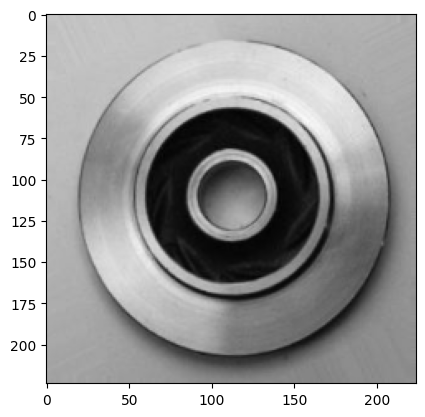

In [85]:
plt.imshow(img_sample)

In [88]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# Prediction of first 10 test samples
pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [89]:
y_labels = []

for _, labels in test_data.unbatch():   # No matter what the image tensor is
  y_labels.append(labels.numpy().argmax())

In [90]:
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [91]:
# Get accuracy score by comparing predicted classes to ground truth labels
from sklearn.metrics import accuracy_score

sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.993006993006993

In [95]:
print("Is sklearn_accuracy close to the accuracy calculated before: ", np.isclose(fine_tune_model_results[1], sklearn_accuracy))   
# fine_tune_model_results[1]  gives the accuracy
print(f"Difference between them : {fine_tune_model_results[1] - sklearn_accuracy}")

Is sklearn_accuracy close to the accuracy calculated before:  True
Difference between them : 1.1254023823958903e-08


In [96]:
class_names = test_data.class_names
class_names[:10]

['def_front', 'ok_front']

In [97]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  '''
  >> A = np.array([2,0,1,8])
  >> A.shape
  Output: (4,)

  >> A[np.newaxis, :]
  Output: array([[2,0,1,8]])

  >> A[:, np.newaxis]
  Output: array([[2],
                 [0],
                 [1],
                 [8]]
  )
  '''
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

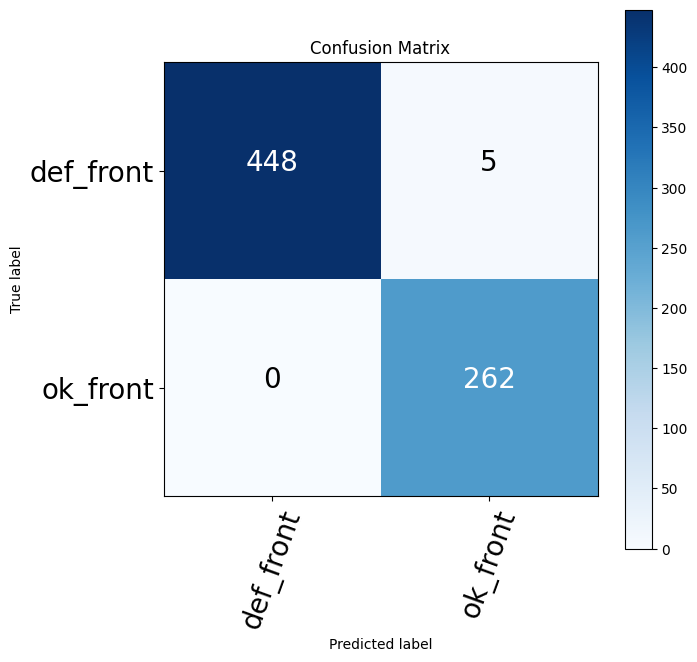

In [102]:
# Plot a confusion matrix with all 25250 predictions, ground truth labels and 101 classes
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(7, 7),
                      text_size=20,
                      norm=False,
                      savefig=True)

### Find the wrong predictions

In [109]:
# Get the filenames of all of our test data
test_img_paths = []
for filepath in test_data.list_files("/content/casting_data/casting_data/test/*/*.jpeg", shuffle=False):
  test_img_paths.append(filepath.numpy())

print("\nNumber of test images: ", len(test_img_paths))


Number of test images:  715


In [110]:
test_img_paths[:10]

[b'/content/casting_data/casting_data/test/def_front/cast_def_0_1059.jpeg',
 b'/content/casting_data/casting_data/test/def_front/cast_def_0_1063.jpeg',
 b'/content/casting_data/casting_data/test/def_front/cast_def_0_108.jpeg',
 b'/content/casting_data/casting_data/test/def_front/cast_def_0_1096.jpeg',
 b'/content/casting_data/casting_data/test/def_front/cast_def_0_112.jpeg',
 b'/content/casting_data/casting_data/test/def_front/cast_def_0_1134.jpeg',
 b'/content/casting_data/casting_data/test/def_front/cast_def_0_1136.jpeg',
 b'/content/casting_data/casting_data/test/def_front/cast_def_0_1137.jpeg',
 b'/content/casting_data/casting_data/test/def_front/cast_def_0_1153.jpeg',
 b'/content/casting_data/casting_data/test/def_front/cast_def_0_1171.jpeg']

In [122]:
dataframe_dict = {"Test_img_path": test_img_paths,
             "True_label": y_labels,
             "Predicted_label": pred_classes,
             "Prediction_prob": pred_probs.max(axis=1), # get the maximum prediction probability value
             "True_classname": [class_names[i] for i in y_labels],
             "Predicted_classname": [class_names[i] for i in pred_classes]}

In [123]:
import pandas as pd

test_df = pd.DataFrame(dataframe_dict)
test_df.head()

,Test_img_path,True_label,Predicted_label,Prediction_prob,True_classname,Predicted_classname
0,b'/content/casting_data/casting_data/test/def_...,0,0,0.716332,def_front,def_front
1,b'/content/casting_data/casting_data/test/def_...,0,0,0.996224,def_front,def_front
2,b'/content/casting_data/casting_data/test/def_...,0,0,0.999962,def_front,def_front
3,b'/content/casting_data/casting_data/test/def_...,0,0,0.714981,def_front,def_front
4,b'/content/casting_data/casting_data/test/def_...,0,0,0.999852,def_front,def_front


In [125]:
test_df['Correctly_predicted'] = test_df['True_label'] == test_df['Predicted_label']
test_df.head()

,Test_img_path,True_label,Predicted_label,Prediction_prob,True_classname,Predicted_classname,Correctly_predicted
0,b'/content/casting_data/casting_data/test/def_...,0,0,0.716332,def_front,def_front,True
1,b'/content/casting_data/casting_data/test/def_...,0,0,0.996224,def_front,def_front,True
2,b'/content/casting_data/casting_data/test/def_...,0,0,0.999962,def_front,def_front,True
3,b'/content/casting_data/casting_data/test/def_...,0,0,0.714981,def_front,def_front,True
4,b'/content/casting_data/casting_data/test/def_...,0,0,0.999852,def_front,def_front,True


In [126]:
wrong_preds_df = test_df[test_df['Correctly_predicted'] == False]
wrong_preds_df

,Test_img_path,True_label,Predicted_label,Prediction_prob,True_classname,Predicted_classname,Correctly_predicted
80,b'/content/casting_data/casting_data/test/def_...,0,1,0.990291,def_front,ok_front,False
122,b'/content/casting_data/casting_data/test/def_...,0,1,0.924472,def_front,ok_front,False
185,b'/content/casting_data/casting_data/test/def_...,0,1,0.810735,def_front,ok_front,False
242,b'/content/casting_data/casting_data/test/def_...,0,1,0.516470,def_front,ok_front,False
379,b'/content/casting_data/casting_data/test/def_...,0,1,0.951709,def_front,ok_front,False


In [128]:
wrong_preds_df = wrong_preds_df.sort_values('Prediction_prob', ascending=False)[:20]  # Most wrong 20 predictions
wrong_preds_df

,Test_img_path,True_label,Predicted_label,Prediction_prob,True_classname,Predicted_classname,Correctly_predicted
80,b'/content/casting_data/casting_data/test/def_...,0,1,0.990291,def_front,ok_front,False
379,b'/content/casting_data/casting_data/test/def_...,0,1,0.951709,def_front,ok_front,False
122,b'/content/casting_data/casting_data/test/def_...,0,1,0.924472,def_front,ok_front,False
185,b'/content/casting_data/casting_data/test/def_...,0,1,0.810735,def_front,ok_front,False
242,b'/content/casting_data/casting_data/test/def_...,0,1,0.516470,def_front,ok_front,False


In [130]:
wrong_preds_df.shape

(5, 7)

In [131]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  if scale:
    img = img/255.
  return img

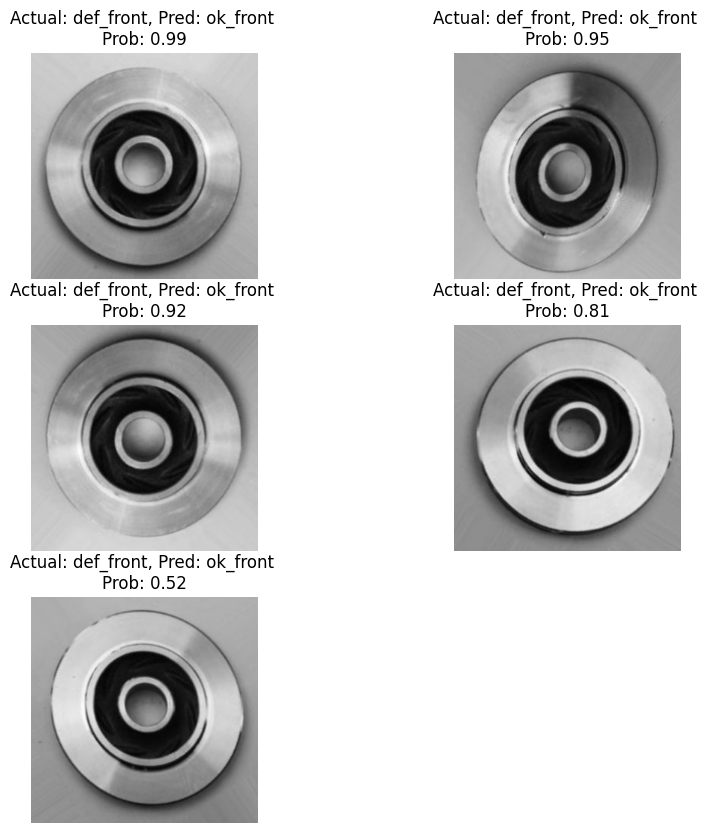

In [145]:
images_to_view = 5

plt.figure(figsize=(10,10))

for i, row in enumerate(wrong_preds_df[:images_to_view].itertuples()):
  plt.subplot(3, 2, i+1)
  img = load_and_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row # only interested in a few parameters of each row
  plt.imshow(img)
  plt.title(f"Actual: {y_true}, Pred: {y_pred} \nProb: {pred_prob:.2f}")
  plt.axis(False)